In [ ]:
# plan: map all front particle sensors to building types (Lucas LC)
# - map particle aquisition to gpx/gps data
# - statistically analyze for LC + building height?
# and perhaps to traffic data

In [ ]:
# contour map
# identifying areas of bad/medium/good pollution

In [1]:
import os

In [2]:
import geopandas as gpd

In [5]:
os.getcwd()

'/run/media/feds/2309E02F47F328C5/EAGLE/Urban_AZwick/FinalMeasurements'

In [ ]:
import re

In [17]:
# for files in standardized_withoutNA
#   select Front data only  
#   vstack
#   map points to LC

df_list = []

for gpkg_file in os.listdir("./data/standardized_withNA"):
    df = gpd.read_file(os.path.join(os.getcwd(), "data/standardized_withNA", gpkg_file))
    df_filtered = df.filter(regex=r'air_particleFront|^distance_from_start_km|^geometry')
    df_list.append(df_filtered)
    # gpd.read_file("./data/standardized_withoutNA/Aufnahme_13062024_nachmittag_combined_standardized_withoutNA.gpkg")

In [18]:
df_list

[     distance_from_start_km  mean_Particles > 0.3um / 0.1L air_particleFront  \
 0                      0.00                                       621.529552   
 1                      0.05                                       803.400000   
 2                      0.10                                      1579.304348   
 3                      0.15                                       705.457823   
 4                      0.20                                       589.636997   
 ..                      ...                                              ...   
 661                   33.05                                              NaN   
 662                   33.10                                       651.660839   
 663                   33.15                                      1434.033027   
 664                   33.20                                       767.900000   
 665                   33.25                                       663.500000   
 
      mean_Particles > 0.5

In [19]:
import pandas as pd

In [20]:
stacked_gdf = pd.concat(df_list, ignore_index=True)

In [22]:
stacked_gdf.reset_index()

,index,distance_from_start_km,mean_Particles > 0.3um / 0.1L air_particleFront,mean_Particles > 0.5um / 0.1L air_particleFront,mean_Particles > 1.0um / 0.1L air_particleFront,mean_Particles > 10.0um / 0.1L air_particleFront,mean_Particles > 2.5um / 0.1L air_particleFront,mean_Particles > 5.0um / 0.1L air_particleFront,geometry
0,0,0.00,621.529552,177.387115,10.462296,0.388889,1.701389,0.857639,POINT (570449.85 5515440.104)
1,1,0.05,803.400000,211.291667,20.166667,0.733333,1.658333,0.733333,POINT (570449.887 5515490.104)
2,2,0.10,1579.304348,330.309289,13.754941,0.000000,1.000000,0.000000,POINT (570448.265 5515539.933)
3,3,0.15,705.457823,197.106133,13.907707,0.650641,2.714598,2.089598,POINT (570412.023 5515567.509)
4,4,0.20,589.636997,174.578947,16.780186,2.117647,4.049536,4.049536,POINT (570362.504 5515573.815)
...,...,...,...,...,...,...,...,...,...
6655,6655,33.05,1011.375000,308.125000,37.000000,0.375000,0.375000,0.375000,POINT (570356.353 5515603.568)
6656,6656,33.10,1062.970588,332.441176,56.382353,0.000000,0.941176,0.000000,POINT (570401.42 5515593.682)
6657,6657,33.15,1138.312500,349.562500,61.770833,0.000000,1.458333,0.000000,POINT (570426.529 5515561.995)
6658,6658,33.20,1062.450000,321.825000,41.900000,0.750000,1.150000,0.750000,POINT (570450.876 5515523.027)


<Axes: >

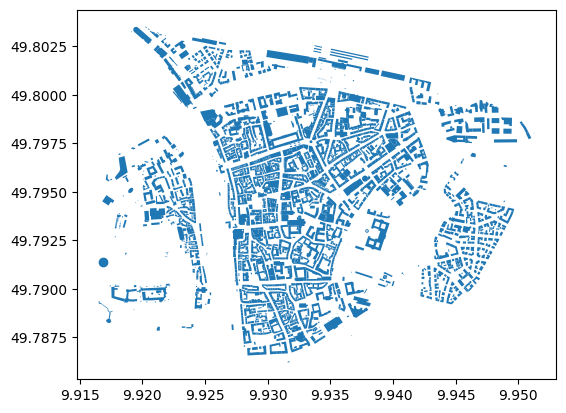

In [11]:
gpd.read_file("./data/de_cuyan/wuerzburg_Buildings.gpkg").plot()

# make contour of gas data

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

df = pd.read_csv('./temperature_2d.csv')
x = np.array(df.lon)
y = np.array(df.lat)
z = np.array(df.value)
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)

X,Y = np.meshgrid(xi,yi)
Z = griddata((x,y),z,(X,Y), method='cubic')

fig = go.Figure(data =
go.Contour(
z=Z,
x=xi,
y=yi,
colorscale = 'Hot',
contours_coloring='heatmap'
))
fig.show()


In [ ]:
gpd.con